# Case 1

## Logistic 回归 + 梯度上升优化算法

In [52]:
import numpy as np
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('MLiAc5_testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split() #去掉前后空格 拆分行成字符串
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])]) #X1=1.0 X2 X3
        labelMat.append(int(lineArr[2])) # 1*100
    return dataMat, labelMat

def sigmoid(X):
    return 1.0/(1+np.exp(-X))

# 梯度上升法
def gradAscent(data, label):
    data = np.mat(data) #2D数组 100*3
    label = np.mat(label).transpose() #100*1
    m, n = np.shape(data)
    print('m, n = ',m,n)
    alpha = 0.001
    iters = 500
    weights = np.zeros((n,1))
    for i in range(iters):
        h = sigmoid(data * weights) #矩阵
        error = label - h #向量 矩阵
        weights += alpha * data.transpose() * error
    return weights

# 随机梯度上升法 
# 学习率调整，迭代多次
def stocGradAscent_0(data, label):
    data = np.array(data)
    m, n = np.shape(data)
    alpha = 0.001
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(data[i]*weights)) #数
        error = label[i] - h #数
        weights += alpha * error * data[i]
    return weights

# 学习率调整，迭代多次
def stocGradAscent(data, label, Iters=150):
    import random
    data = np.array(data)
    m, n = np.shape(data)
    weights = np.ones(n)
    X0=[];X1=[];X2=[]
    
    for j in range(Iters): #迭代次数
        dataIndex = list(range(m))
        for i in range(m): #样本点下标
            alpha = 4/(1.+j+i)+0.01 #learning rate随迭代次数不断减小
            randIndex = int(random.uniform(0, len(dataIndex))) #随机选取样本来更新回归系数：减少周期性波动
            h = sigmoid(sum(data[randIndex]*weights)) #数
            error = label[randIndex] - h #数
            weights += alpha * error * data[randIndex] 
            del(dataIndex[randIndex]) #删除已训练过的样本号
            
            X0.append(weights[0]);X1.append(weights[1]);X2.append(weights[2])
            hist = [X0, X1, X2]
    return weights  , hist     

In [38]:
data, label = loadDataSet()
gradAscent(data, label)

m, n =  100 3


array([[ 3.90548504],
       [ 0.46094335],
       [-0.58933895]])

## plot

In [54]:
def plotLR(weights):
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np
    data, label = loadDataSet()
    data_array = np.array(data)
    n = np.shape(data_array)[0] #行：样本数
    xcord1 = []; ycord1 = [] #X1 X2分布 按标签分开
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(label[i]) == 1:
            xcord1.append(data_array[i, 1]); ycord1.append(data_array[i, 2])
        else:
            xcord2.append(data_array[i, 1]); ycord2.append(data_array[i, 2])
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    # scatter
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s') #label=1时散点图
    ax.scatter(xcord2, ycord2, s=30, c='blue')
    # line
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1]*x) / weights[2] #(w0x0+w1x1+w2x2=0, x0=1)
    ax.plot(x, y)
    
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

def plotXs(Xs):
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np
    X0 = Xs[0]; X1 = Xs[1]; X2 = Xs[2]
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(311)
    plt.plot(X0)
    plt.ylabel('X0')
    ax = fig.add_subplot(312)
    plt.plot(X1)
    plt.ylabel('X1')
    ax = fig.add_subplot(313)
    plt.plot(X2)
    plt.ylabel('X2')
    plt.xlabel('Iterations');
    plt.show()

m, n =  100 3
GranAscent Weights:  [[ 3.90548504]
 [ 0.46094335]
 [-0.58933895]]


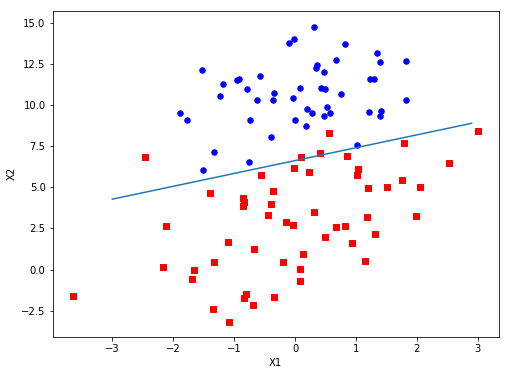

StocGranAscent Weights:  [0.963951   0.9826866  0.49153886]


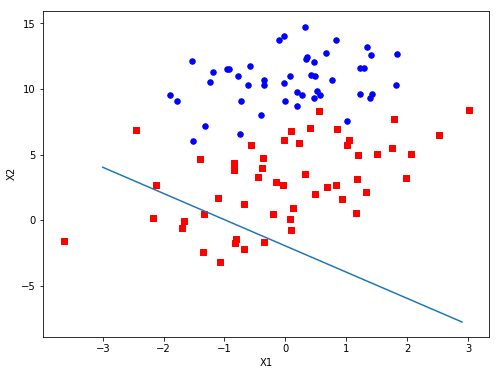

In [28]:
weights =  gradAscent(data, label) 
print('GranAscent Weights: ',weights)
plotLR(weights)

weights =  stocGradAscent_0(data, label)  
print('StocGranAscent Weights: ',weights)
plotLR(weights)


StocGranAscent Weights:  [13.80896844  0.92083505 -1.92324288]


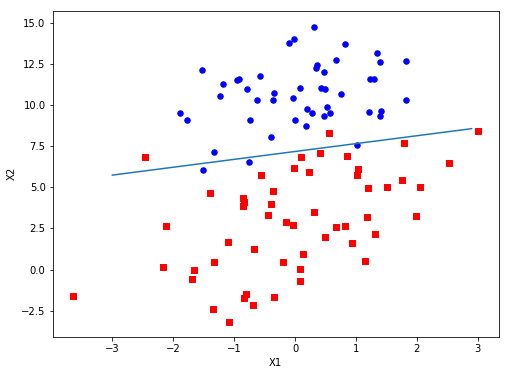

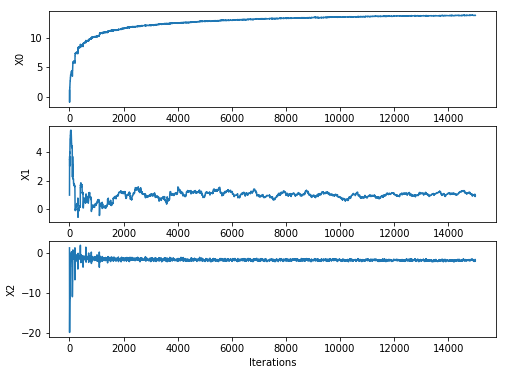

In [58]:
weights ,hist =  stocGradAscent(data, label) #,500) 
print('StocGranAscent Weights: ',weights)
plotLR(weights)
plotXs(hist)

# Case 2: 从疝气病症预测病马的死亡率
368个样本 28个特征

## data process
处理缺失数据：已处理好的

## test algrithom

In [85]:
def classifySigmoid(X, weights):
    prob = sigmoid(sum(X*weights))
    if prob > 0.5: return 1
    else: return 0

def horseTest():
    import numpy as np
    
    frTrain = open('MLiAc5_horseColicTraining.txt')
    frTest = open('MLiAc5_horseColicTest.txt')
    trainData = []; trainLabel = []
    for line in frTrain.readlines():
        currline = line.strip().split('\t') #以跳格键分割的标签
        lineArr = []
        for i in range(21):
            lineArr.append(float(currline[i]))
        trainData.append(lineArr)
        trainLabel.append(float(currline[21]))
    trainWeights,hist = stocGradAscent(np.array(trainData), trainLabel, 500)
    
    errorCount = 0
    numTest = 0.0
    for line in frTest.readlines():
        numTest += 1
        currline = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currline[i]))  
        predict = classifySigmoid(np.array(lineArr), trainWeights)
        if int(predict) != int(currline[21]):
            errorCount += 1
            print('No. %d Test is %s but predicted as %s.'%(numTest, currline[21], predict))
    errorRate = float(errorCount)/numTest
    print("The error rate of this test is %f"%errorRate)
    return errorRate

# 多次测试 10次测试取平均
def multiTest(numTests=10):
    errorSum = 0.0
    for k in range(numTests):
        print(' - '*6, 'Test No.%d/%d'%(k+1, numTests), ' - '*6)
        errorSum += horseTest()
    print(" == "*8)
    print("After %d tests, the average error rate is %f"%(numTests, errorSum/numTests))

In [77]:
horseTest()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


No. 3 Test is 1 but predicted as 0.
No. 5 Test is 1 but predicted as 0.
No. 8 Test is 1 but predicted as 0.
No. 14 Test is 1 but predicted as 0.
No. 15 Test is 1 but predicted as 0.
No. 16 Test is 1 but predicted as 0.
No. 21 Test is 1 but predicted as 0.
No. 22 Test is 1 but predicted as 0.
No. 25 Test is 1 but predicted as 0.
No. 28 Test is 1 but predicted as 0.
No. 32 Test is 1 but predicted as 0.
No. 33 Test is 1 but predicted as 0.
No. 35 Test is 1 but predicted as 0.
No. 37 Test is 1 but predicted as 0.
No. 38 Test is 1 but predicted as 0.
No. 39 Test is 1 but predicted as 0.
No. 43 Test is 1 but predicted as 0.
No. 45 Test is 1 but predicted as 0.
No. 46 Test is 1 but predicted as 0.
No. 47 Test is 1 but predicted as 0.
No. 48 Test is 1 but predicted as 0.
No. 49 Test is 1 but predicted as 0.
No. 53 Test is 0 but predicted as 1.
No. 54 Test is 1 but predicted as 0.
No. 57 Test is 1 but predicted as 0.
No. 59 Test is 1 but predicted as 0.
No. 60 Test is 1 but predicted as 0.
No. 

0.44776119402985076

In [84]:
multiTest()

 -  -  -  -  -  -  Test No.1/10  -  -  -  -  -  - 


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


No. 5 Test is 1 but predicted as 0.
No. 15 Test is 1 but predicted as 0.
No. 21 Test is 1 but predicted as 0.
No. 28 Test is 1 but predicted as 0.
No. 32 Test is 1 but predicted as 0.
No. 33 Test is 1 but predicted as 0.
No. 35 Test is 1 but predicted as 0.
No. 38 Test is 1 but predicted as 0.
No. 43 Test is 1 but predicted as 0.
No. 45 Test is 1 but predicted as 0.
No. 46 Test is 1 but predicted as 0.
No. 48 Test is 1 but predicted as 0.
No. 52 Test is 0 but predicted as 1.
No. 53 Test is 0 but predicted as 1.
No. 54 Test is 1 but predicted as 0.
No. 57 Test is 1 but predicted as 0.
No. 58 Test is 0 but predicted as 1.
No. 59 Test is 1 but predicted as 0.
No. 60 Test is 1 but predicted as 0.
No. 65 Test is 0 but predicted as 1.
No. 67 Test is 0 but predicted as 1.
The error rate of this test is 0.313433
 -  -  -  -  -  -  Test No.2/10  -  -  -  -  -  - 
No. 5 Test is 1 but predicted as 0.
No. 15 Test is 1 but predicted as 0.
No. 21 Test is 1 but predicted as 0.
No. 28 Test is 1 but pr

No. 3 Test is 1 but predicted as 0.
No. 5 Test is 1 but predicted as 0.
No. 14 Test is 1 but predicted as 0.
No. 15 Test is 1 but predicted as 0.
No. 21 Test is 1 but predicted as 0.
No. 25 Test is 1 but predicted as 0.
No. 28 Test is 1 but predicted as 0.
No. 32 Test is 1 but predicted as 0.
No. 33 Test is 1 but predicted as 0.
No. 35 Test is 1 but predicted as 0.
No. 37 Test is 1 but predicted as 0.
No. 43 Test is 1 but predicted as 0.
No. 45 Test is 1 but predicted as 0.
No. 46 Test is 1 but predicted as 0.
No. 47 Test is 1 but predicted as 0.
No. 48 Test is 1 but predicted as 0.
No. 49 Test is 1 but predicted as 0.
No. 52 Test is 0 but predicted as 1.
No. 53 Test is 0 but predicted as 1.
No. 54 Test is 1 but predicted as 0.
No. 57 Test is 1 but predicted as 0.
No. 59 Test is 1 but predicted as 0.
No. 60 Test is 1 but predicted as 0.
No. 67 Test is 0 but predicted as 1.
The error rate of this test is 0.358209
After 10 tests, the average error rate is 0.347761
